<a href="https://colab.research.google.com/github/fidousAbir/ARIMA_Model/blob/main/modelARIMA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# `Ce texte est au format code`
```

Importation des packages

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 44.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import statsmodels as ts
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace import sarimax
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import statsmodels as stat
register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

Imporation des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ETG1.csv')
df

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,date,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
0,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,2022-01-01 00:00:02,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
1,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,2022-01-01 00:00:07,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,2022-01-01 00:00:13,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
3,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,2022-01-01 00:00:18,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
4,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,2022-01-01 00:00:23,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221129,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.254
221130,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.255
221131,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.256
221132,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.257


In [ ]:
#transformer la colonne de type objet en type  date
timefmt = "%Y-%m-%d %H:%M:%S"
df['date'] = pd.to_datetime(df['date'], format = timefmt, errors='coerce')
df

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,date,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
0,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,2022-01-01 00:00:02,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
1,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,2022-01-01 00:00:07,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,2022-01-01 00:00:13,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
3,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,2022-01-01 00:00:18,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
4,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,2022-01-01 00:00:23,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221129,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.254
221130,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.255
221131,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.256
221132,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.257


In [ ]:
df.set_index(df.date)

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,date,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
date,,,,,,,,,,,,,,,,,
2022-01-01 00:00:02,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,2022-01-01 00:00:02,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
2022-01-01 00:00:07,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,2022-01-01 00:00:07,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2022-01-01 00:00:13,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,2022-01-01 00:00:13,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
2022-01-01 00:00:18,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,2022-01-01 00:00:18,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
2022-01-01 00:00:23,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,2022-01-01 00:00:23,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 17:32:26,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.254
2022-01-24 17:32:26,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.255
2022-01-24 17:32:26,393403,61eed49add4ae07ecb9e1532,46.0,377.7,1379.3,259.9,1,2022-01-24 17:32:26,452942,257.3,1420.6,4687.2,5583.3,0.126,0.310,259.8,0.256


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ETG1.csv', parse_dates = ['date'], index_col = ['date'])
df.head()

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
date,,,,,,,,,,,,,,,,
2022-01-01 00:00:02,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
2022-01-01 00:00:07,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2022-01-01 00:00:13,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
2022-01-01 00:00:18,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
2022-01-01 00:00:23,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048


In [ ]:
df['RealP1']=df['RealP1'].astype('float')
df['RealP1']=df['RealP2'].astype('float')
df['RealP1']=df['RealP3'].astype('float')
df['RealP_tot']=df['RealP1']+df['RealP2']+df['RealP3']

In [ ]:
df.describe()

,Unnamed: 0,RealP2,RealP3,RealP1,Vrms1,ETG,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1,RealP_tot
count,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000,221134.0,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000,221134.000000
mean,282994.760955,48.149098,74.111818,74.111818,257.823398,1.0,342521.776299,256.119081,558.941535,947.888290,1568.788664,0.276171,0.297326,258.013468,0.391749,196.372734
std,63850.347473,82.016061,127.673794,127.673794,1.963170,0.0,63854.493551,1.820844,597.438689,1540.867731,2404.410202,0.140180,0.075478,1.857693,0.368411,276.055430
min,0.000000,0.300000,0.100000,0.100000,250.800000,1.0,59338.000000,250.500000,219.700000,236.800000,332.600000,0.001000,0.001000,251.900000,0.000000,11.700000
25%,227716.250000,10.200000,22.300000,22.300000,256.500000,1.0,287240.250000,254.800000,242.600000,280.300000,429.500000,0.159000,0.286000,256.700000,0.080000,58.100000
50%,282999.500000,13.100000,24.500000,24.500000,257.900000,1.0,342523.500000,256.100000,250.000000,288.000000,484.000000,0.203000,0.321000,258.000000,0.174000,67.700000
75%,338282.750000,71.300000,27.100000,27.100000,259.300000,1.0,397810.750000,257.500000,597.900000,422.400000,708.000000,0.416000,0.351000,259.500000,0.806000,154.300000
max,393403.000000,782.200000,897.400000,897.400000,263.100000,1.0,452942.000000,261.300000,5423.000000,9199.100000,17949.200000,0.731000,0.606000,262.900000,0.997000,2140.000000


In [ ]:
df = pd.DataFrame(df,columns=['RealP_tot'])
df

,RealP_tot
date,
2022-01-01 00:00:02,60.1
2022-01-01 00:00:07,59.8
2022-01-01 00:00:13,59.5
2022-01-01 00:00:18,55.6
2022-01-01 00:00:23,66.0
...,...
2022-01-24 17:32:26,801.4
2022-01-24 17:32:26,801.4
2022-01-24 17:32:26,801.4


Visualisation des données

In [ ]:
df.drop(df.index[2500:], inplace=True)
df

,RealP_tot
date,
2022-01-01 00:00:02,60.1
2022-01-01 00:00:07,59.8
2022-01-01 00:00:13,59.5
2022-01-01 00:00:18,55.6
2022-01-01 00:00:23,66.0
...,...
2022-01-11 13:23:17,80.9
2022-01-11 13:23:22,78.6
2022-01-11 13:23:27,72.6


In [ ]:
upper_lim=df['RealP_tot'].quantile(.75)
df_outilers=df[df['RealP_tot']>upper_lim]
df_outilers

,RealP_tot
date,
2022-01-11 09:47:11,800.7
2022-01-11 09:47:16,800.1
2022-01-11 09:47:21,801.0
2022-01-11 09:47:27,804.4
2022-01-11 09:47:32,804.1
...,...
2022-01-11 12:38:24,793.4
2022-01-11 12:38:29,799.3
2022-01-11 12:38:34,799.8


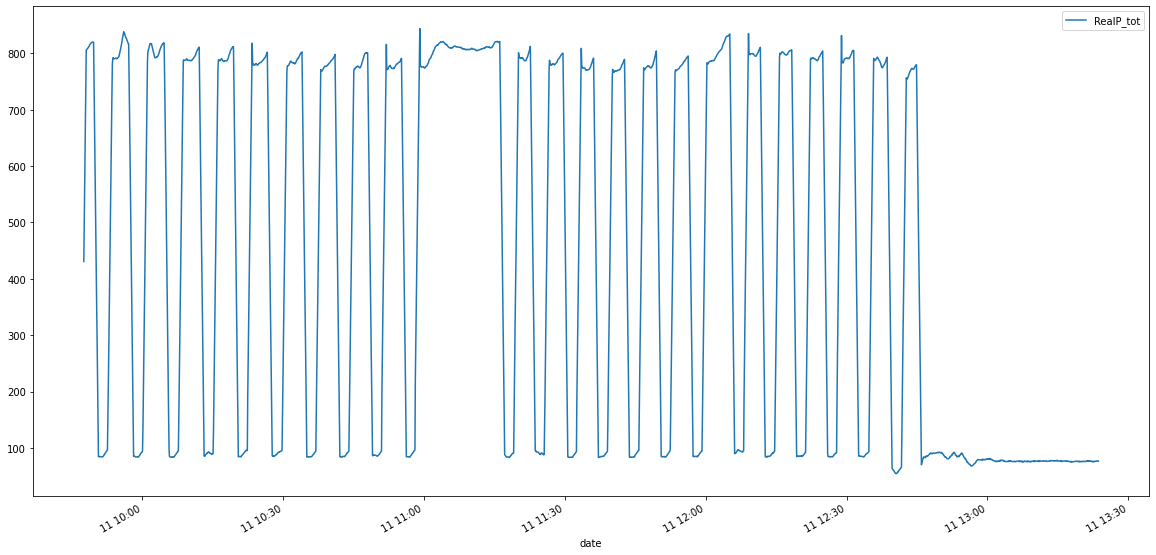

In [ ]:
df[['RealP_tot']].rolling(12).mean().plot(figsize=(20,10))

In [ ]:
df.describe() #decription des données

,RealP_tot
count,2500.000000
mean,442.572760
std,357.030534
min,48.200000
25%,84.000000
50%,737.100000
75%,793.200000
max,1576.200000


# Transformation BOX-COX log_10
On applique une transformation Box-COX (log_10) pour
pénalise d'avantage les valeurs les plus élevées dans la série  

In [ ]:
df=np.log(df)

Décomposition de la série

<function matplotlib.pyplot.tight_layout>

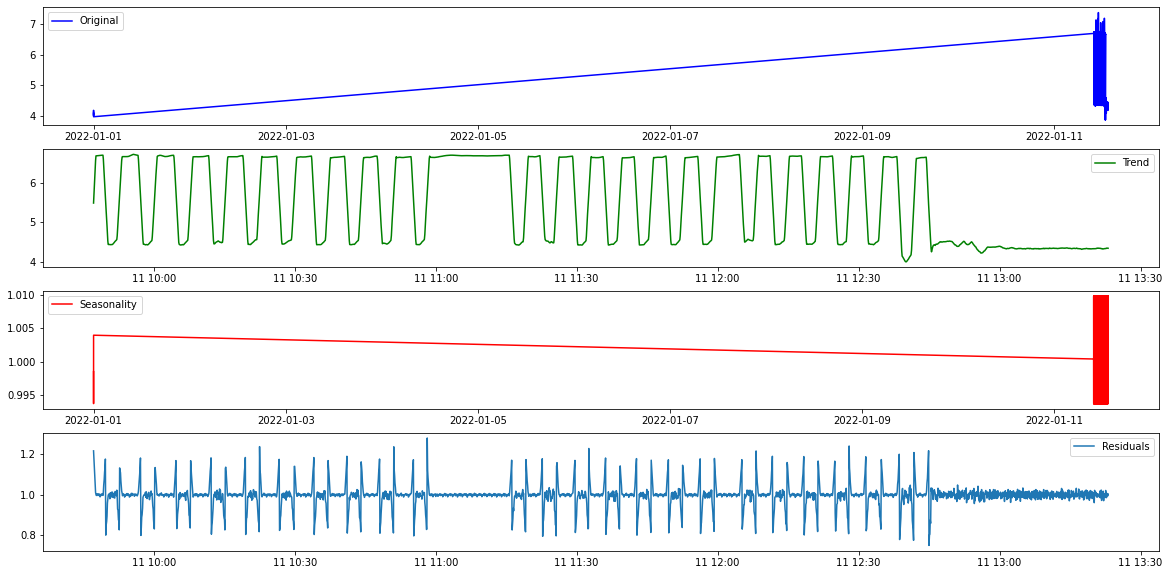

In [ ]:
decomposition = seasonal_decompose(df,model = 'multiplicatif',period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df, 'blue', label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, 'green', label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, 'red', label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout

In [ ]:
result = adfuller(df['RealP_tot'])

print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -7.039257547457318
p-value : 5.904892278865985e-10
Valeurs Critiques :
	1%: -3.4329715599546646
	5%: -2.862698190651408
	10%: -2.567386549839784


Différentiation : ordre 1

In [ ]:
df_diff=df.diff()
df_diff = df_diff.iloc[1:]
df_diff.head()

,RealP_tot
date,
2022-01-01 00:00:07,-0.005004
2022-01-01 00:00:13,-0.005029
2022-01-01 00:00:18,-0.067793
2022-01-01 00:00:23,0.171472
2022-01-01 00:00:28,-0.208106


Statistiques ADF : -52.826405768262795
p-value : 0.0
Valeurs Critiques :
	1%: -3.4329705094097114
	5%: -2.8626977267304357
	10%: -2.5673863028421136


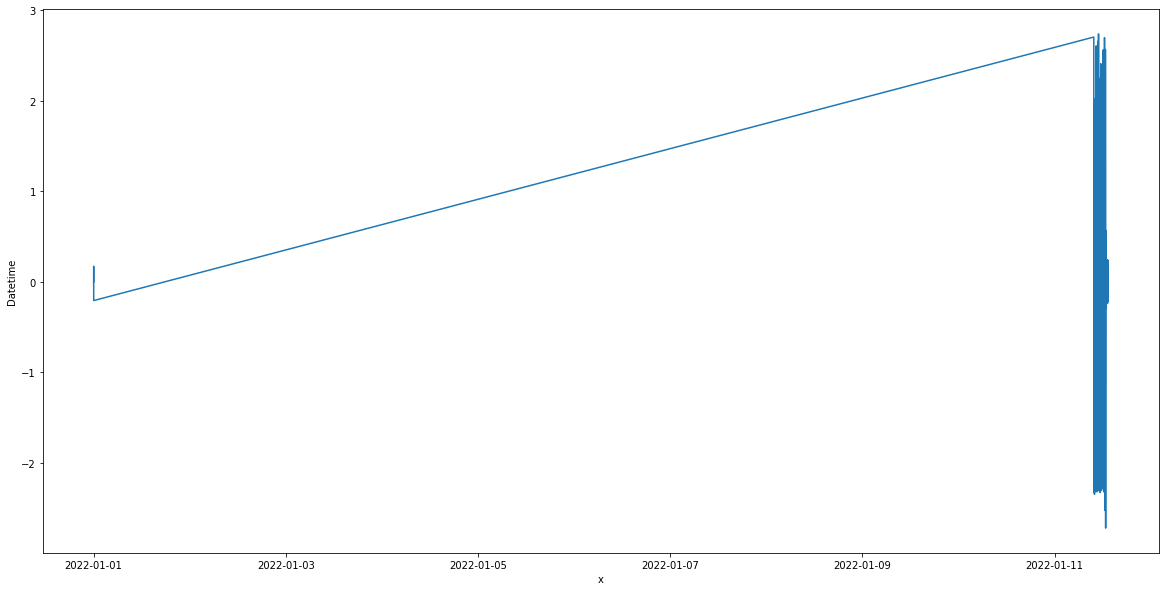

In [ ]:
result = adfuller(df_diff['RealP_tot'])

plt.figure(figsize=(20,10))
plt.xlabel('x')
plt.ylabel('Datetime')
plt.plot(df_diff)
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


la série est stationnaire : p_value <0.05 et la statistique du test  est inférieure aux valeurs critiques, donc la série de différence première est stationnaire. ==> d=1

# Détermination des paramtères du modèle ARIMA


# Nouvelle section

ACF : pour déterminer l'odre de MA

<Figure size 1440x720 with 0 Axes>

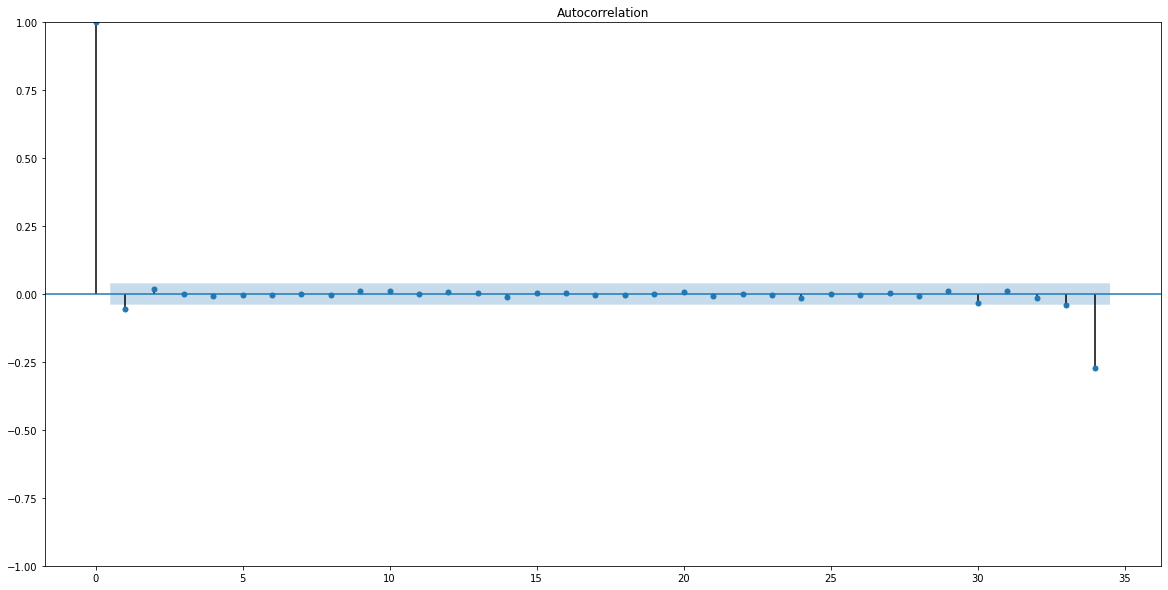

In [ ]:
from statsmodels.graphics.tsaplots import *

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(df_diff)
plt.show() ##MA(4)

PACF : déterminer l'ordre de AR

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


<Figure size 1440x720 with 0 Axes>

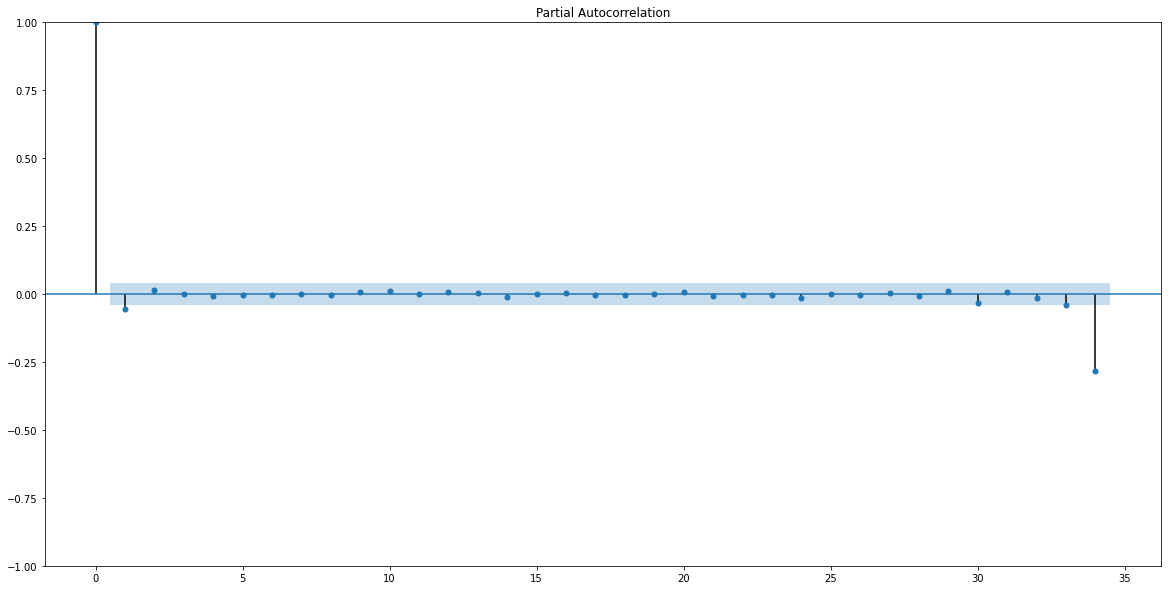

In [ ]:
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(df_diff)
plt.show() ##AR(5)

On peut utiliser la fonction auto_arima, qui détermine les paramètres p,d et q automatiquement.
Cette fonction détermine les meilleurs en minimisant l'AIC.
AIC=2k-2ln(L)

In [ ]:
model_autoARIMA = auto_arima(df, start_p=1, start_q=1, max_p=6, max_q=6, seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1419.295, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1423.479, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1417.708, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1417.939, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1421.479, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1419.235, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1421.235, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1415.708, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1417.235, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1417.296, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1415.939, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1419.235, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.391 seconds
                               SARIMAX Results                                
Dep. Vari

Train/Test

,RealP_tot
date,
2022-01-01 00:00:02,4.096010
2022-01-01 00:00:07,4.091006
2022-01-01 00:00:13,4.085976
2022-01-01 00:00:18,4.018183
2022-01-01 00:00:23,4.189655


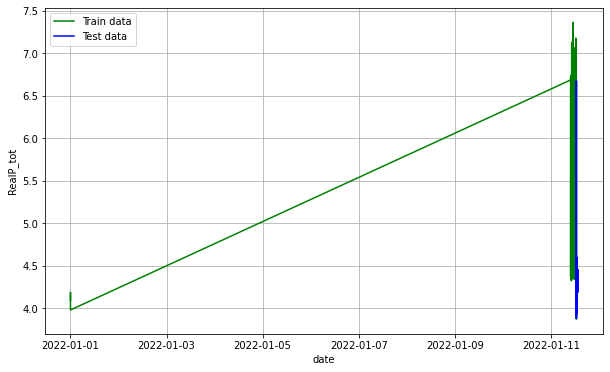

In [ ]:
train_data, test_data = df[0:int(len(df)*0.80)], df[int(len(df)*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('RealP_tot')
plt.plot(df, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
train_data.head()

video

In [ ]:
test_data.shape

(500, 1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm


In [ ]:
model = sm.tsa.arima.ARIMA(train_data, order=(0,1,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              RealP_tot   No. Observations:                 2000
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -708.983
Date:                Wed, 08 Jun 2022   AIC                           1419.966
Time:                        09:47:58   BIC                           1425.567
Sample:                             0   HQIC                          1422.023
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1190      0.001    144.241      0.000       0.117       0.121
Ljung-Box (L1) (Q):                   2.95   Jarque-Bera (JB):            130822.50
Prob(Q):                              0.09   Pr

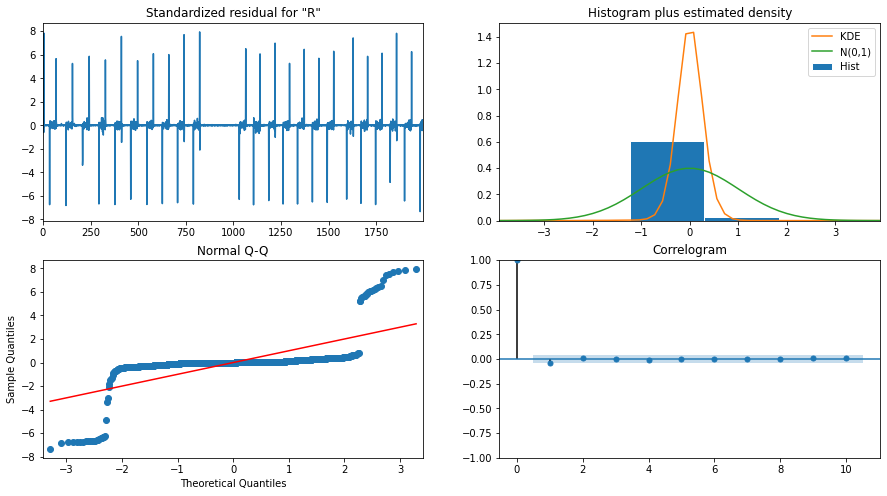

In [ ]:
result.plot_diagnostics(figsize=(15,8))
plt.show()

Test de Box Pierce

predicted=0.388018, expected=0.393594
predicted=0.393594, expected=0.396919
predicted=0.396919, expected=0.394155
predicted=0.394155, expected=0.407658
predicted=0.407658, expected=0.401552
predicted=0.401552, expected=0.394713
predicted=0.394713, expected=0.390166
predicted=0.390166, expected=0.397464
predicted=0.397464, expected=0.402939
predicted=0.402939, expected=0.394528
predicted=0.394528, expected=0.404478
predicted=0.404478, expected=0.424413
predicted=0.424413, expected=0.418920
predicted=0.418920, expected=0.408806
predicted=0.408806, expected=0.416821
predicted=0.416821, expected=0.425812
predicted=0.425812, expected=0.409619
predicted=0.409619, expected=0.428148
predicted=0.428148, expected=0.405828
predicted=0.405828, expected=0.426228
predicted=0.426228, expected=0.668232
predicted=0.668232, expected=0.641605
predicted=0.641605, expected=0.641674
predicted=0.641674, expected=0.640108
predicted=0.640108, expected=0.638554
predicted=0.638554, expected=0.638606
predicted=0.

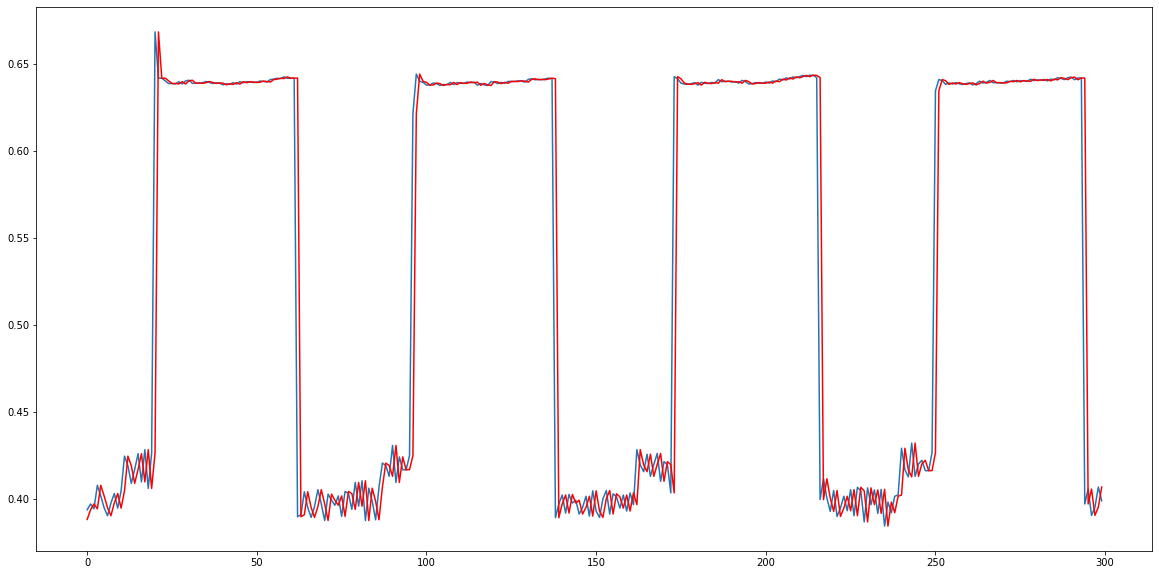

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels
X = df.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model =  statsmodels.tsa.arima.model.ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print('Test RMSE: %.3f' % rmse)
print('Test mae:%.3f' %mae)

# plot forecasts against actual outcomes
plt.plot(test)# La courbe bleu : vrai valeur
plt.plot(predictions, color='red')# la courbe rouge : les valeurs prédites par le modèle( ARIMA(1,2,1) )
plt.show()

In [ ]:
df=pd.DataFrame(test)
df['prediction']=predictions


NameError: ignored

In [ ]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
Dataset=df[size:]
Dataset['predictions']=predictions

NameError: ignored

In [ ]:
print (df)

                     RealP_tot
date                          
2022-01-01 00:00:02   4.096010
2022-01-01 00:00:07   4.091006
2022-01-01 00:00:13   4.085976
2022-01-01 00:00:18   4.018183
2022-01-01 00:00:23   4.189655
...                        ...
2022-01-11 13:23:17   4.393214
2022-01-11 13:23:22   4.364372
2022-01-11 13:23:27   4.284965
2022-01-11 13:23:32   4.314818
2022-01-11 13:23:37   4.314818

[2500 rows x 1 columns]


In [ ]:
df.to_csv("C:\\Users\\pc\\Desktop\\csv\\result.csv")


In [ ]:
#Dataset=df[size:]
#Dataset['predictions']=predictions

NameError: ignored

enregister la modele

In [ ]:
# loading library
import pickle

In [ ]:
# create an iterator object with write permission - model.pkl
with open('model_arima', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
# load saved model
with open('model_arima' , 'rb') as f:
    lr = pickle.load(f)